# Capítulo 03 - Regressão linear

## Lab

### Regressão linear simples

In [40]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = load_boston(return_X_y=False)
# dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

df_housing = pd.DataFrame(df["data"], columns=df["feature_names"].tolist())
df_housing["MEDV"] = df["target"].copy()

df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
X = df_housing["LSTAT"]
X = sm.add_constant(X)
X
# y = df_housing["MEDV"]

# model = sm.OLS(y, X)
# result = model.fit()

# print(result.summary())

,const,LSTAT
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [53]:
x_new = pd.DataFrame([5,10,15], columns=["LSTAT"])
x_new = sm.add_constant(x_new)
x_new
y_pred = model.predict(x_new)
y_pred

ValueError: shapes (506,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

## Exercícios aplicados

### Exercício 08

In [1]:
df_auto = pd.read_csv("../data/Auto.csv")
df_auto.sample(10, random_state=42)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
114,26.0,4,98.0,90,2265,15.5,73,2,fiat 124 sport coupe
278,31.5,4,89.0,71,1990,14.9,78,2,volkswagen scirocco
237,30.5,4,98.0,63,2051,17.0,77,1,chevrolet chevette
57,24.0,4,113.0,95,2278,15.5,72,3,toyota corona hardtop
72,15.0,8,304.0,150,3892,12.5,72,1,amc matador (sw)
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
73,13.0,8,307.0,130,4098,14.0,72,1,chevrolet chevelle concours (sw)
157,15.0,8,350.0,145,4440,14.0,75,1,chevrolet bel air
153,18.0,6,250.0,105,3459,16.0,75,1,chevrolet nova
358,31.6,4,120.0,74,2635,18.3,81,3,mazda 626


In [7]:
# Removendo os registros referentes aos registros em HP.
df_auto_w_hp = df_auto.loc[~df_auto["horsepower"].str.isnumeric(),:]

df_auto_hp = df_auto.loc[df_auto["horsepower"].str.isnumeric(),:]

df_auto_hp.loc[:,"horsepower"] = df_auto_hp.loc[:,"horsepower"].astype("float64")

In [3]:
# a)

# Adicionando um termo constante:
x_horsepower = df_auto_hp.loc[:, "horsepower"].values

# Definindo fator/preditor/variável de entrada e resposta/variável de saída
x_horsepower = sm.add_constant(x_horsepower)
y_mpg = df_auto_hp.loc[:, "mpg"].values

model = sm.OLS(y_mpg, x_horsepower)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           7.03e-81
Time:                        23:35:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

*i, ii e iii)* Há um relacionamento mediano entre o preditor e a resposta. O R² ajustado está em 0,605. O relacionamento entre o preditor e a resposta é negativo.

In [4]:
model = LinearRegression()
model.fit(df_auto_hp["horsepower"].values.reshape(-1,1), y_mpg.reshape(-1,1))

x = np.array(98)
y_pred = model.predict(x.reshape(1, -1))
y_pred

array([[24.46707715]])

# Testando train test splits e seu efeito no erro

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

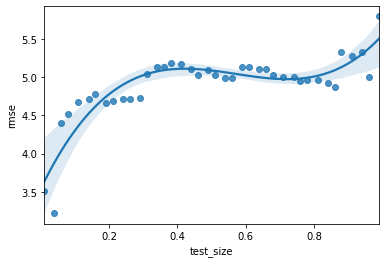

In [53]:
x_horsepower = df_auto_hp.loc[:, "horsepower"].values
y_mpg = df_auto_hp.loc[:, "mpg"].values

lst_test_size = np.arange(start=.01, stop=1, step=.025)

df_mse = []

for i, test_size in enumerate(lst_test_size):
    x_train, x_test, y_train, y_test = train_test_split(x_horsepower.reshape(-1, 1), y_mpg,
                                                        test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred)**.5
    # print(f"{round(test_size, 2):.2f} -- {round(rmse,2):.2f}")
    df_mse.append([round(test_size, 2), rmse])
    
df_mse = pd.DataFrame(df_mse, columns=["test_size", "rmse"])

sns.regplot(x="test_size", y="rmse", data=df_mse, order=3);